# GERMAN CREDIT MODELING

Analysis of the open source data sample: German Credit Data. It contains observations on 20 variables for 1000 bank clients. Client are rated as “good credit” (700 cases) or “bad credit” (300 cases) based on how well they repay their debts.

### Metadata as follows:

<pre>Attribute 1: (qualitative) 
Status of existing checking account 
A11 : ... < 0 DM 
A12 : 0 <= ... < 200 DM 
A13 : ... >= 200 DM / salary assignments for at least 1 year 
A14 : no checking account 

Attribute 2: (numerical) 
Duration in month 

Attribute 3: (qualitative) 
Credit history 
A30 : no credits taken/ all credits paid back duly 
A31 : all credits at this bank paid back duly 
A32 : existing credits paid back duly till now 
A33 : delay in paying off in the past 
A34 : critical account/ other credits existing (not at this bank) 

Attribute 4: (qualitative) 
Purpose 
A40 : car (new) 
A41 : car (used) 
A42 : furniture/equipment 
A43 : radio/television 
A44 : domestic appliances 
A45 : repairs 
A46 : education 
A47 : (vacation - does not exist?) 
A48 : retraining 
A49 : business 
A410 : others 

Attribute 5: (numerical) 
Credit amount 

Attibute 6: (qualitative) 
Savings account/bonds 
A61 : ... < 100 DM 
A62 : 100 <= ... < 500 DM 
A63 : 500 <= ... < 1000 DM 
A64 : .. >= 1000 DM 
A65 : unknown/ no savings account 

Attribute 7: (qualitative) 
Present employment since 
A71 : unemployed 
A72 : ... < 1 year 
A73 : 1 <= ... < 4 years 
A74 : 4 <= ... < 7 years 
A75 : .. >= 7 years 

Attribute 8: (numerical) 
Installment rate in percentage of disposable income 

Attribute 9: (qualitative) 
Personal status and sex 
A91 : male : divorced/separated 
A92 : female : divorced/separated/married 
A93 : male : single 
A94 : male : married/widowed 
A95 : female : single 

Attribute 10: (qualitative) 
Other debtors / guarantors 
A101 : none 
A102 : co-applicant 
A103 : guarantor 

Attribute 11: (numerical) 
Present residence since 

Attribute 12: (qualitative) 
Property 
A121 : real estate 
A122 : if not A121 : building society savings agreement/ life insurance 
A123 : if not A121/A122 : car or other, not in attribute 6 
A124 : unknown / no property 

Attribute 13: (numerical) 
Age in years 

Attribute 14: (qualitative) 
Other installment plans 
A141 : bank 
A142 : stores 
A143 : none 

Attribute 15: (qualitative) 
Housing 
A151 : rent 
A152 : own 
A153 : for free 

Attribute 16: (numerical) 
Number of existing credits at this bank 

Attribute 17: (qualitative) 
Job 
A171 : unemployed/ unskilled - non-resident 
A172 : unskilled - resident 
A173 : skilled employee / official 
A174 : management/ self-employed/ 
highly qualified employee/ officer 

Attribute 18: (numerical) 
Number of people being liable to provide maintenance for 

Attribute 19: (qualitative) 
Telephone 
A191 : none 
A192 : yes, registered under the customers name 

Attribute 20: (qualitative) 
foreign worker 
A201 : yes 
A202 : no 
</pre>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Metadata
md = pd.read_csv('~/Documents/My Samples/GermanCreditMetaData.csv',header=0,index_col='Code')
md['Ord Meaning'] = md.index + ' ' + md.Meaning
mdmap = md['Ord Meaning'].to_dict()

In [17]:
# Data
df = pd.read_csv('~/Documents/My Samples/germancredit.csv',header=0)

In [18]:
df.describe().transpose()
# No Missing Values

,count,mean,std,min,25%,50%,75%,max
GoodCredit,1000.0,1.300,0.458487,1.0,1.0,1.0,2.00,2.0
duration2,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount5,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment8,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence11,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age13,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
cards16,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
liable18,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [19]:
df.describe(include='O').transpose()
# No Missing Values

,count,unique,top,freq
checkingstatus1,1000,4,A14,394
history3,1000,5,A32,530
purpose4,1000,10,A43,280
savings6,1000,5,A61,603
employ7,1000,5,A73,339
status9,1000,4,A93,548
others10,1000,3,A101,907
property12,1000,4,A123,332
otherplans14,1000,3,A143,814
housing15,1000,3,A152,713


## Exploratory Data Analysis

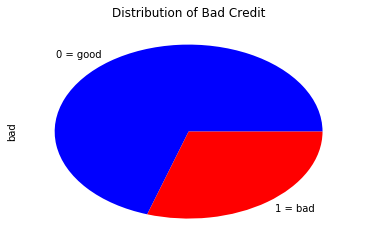

In [20]:
# Dependent Variable
# Use Target Bad Credit (Good Credit == 2)
df['bad'] = df.pop('GoodCredit') - 1
_ = df.bad.map({1:'1 = bad', 0:'0 = good'}).value_counts().plot(kind='pie',
            title='Distribution of Bad Credit',colormap='bwr')

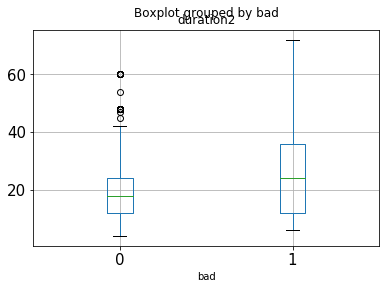

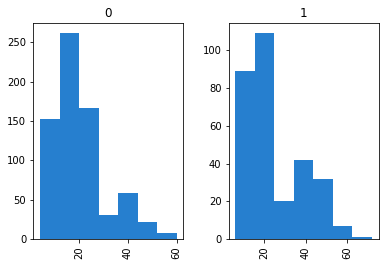

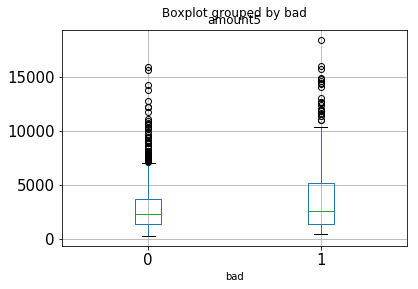

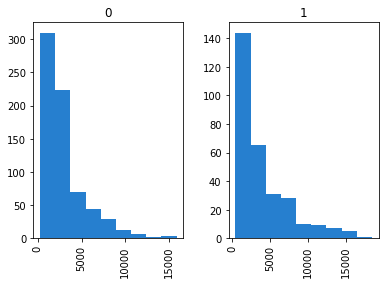

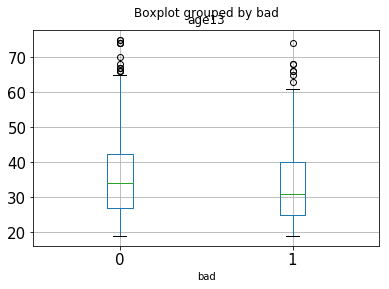

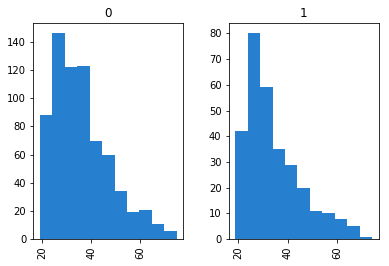

In [21]:
b = {'duration2':7,'amount5':9,'age13':11}
for col in ['duration2','amount5','age13']:
    df.boxplot(column=col,by='bad',fontsize=15)
    df.hist(column=col,by='bad',color='#267fcf',bins=b[col])

In [22]:
# Sparce Numerical Variables
v_sparce = ['installment8','residence11','cards16','liable18']
for col in v_sparce:
    display(pd.crosstab(df[col],df.bad).style.bar(align='zero',color='lightgreen'))

bad,0,1
installment8,,
1,102,34
2,169,62
3,112,45
4,317,159


bad,0,1
residence11,,
1,94,36
2,211,97
3,106,43
4,289,124


bad,0,1
cards16,,
1,433,200
2,241,92
3,22,6
4,4,2


bad,0,1
liable18,,
1,591,254
2,109,46


In [23]:
v_nominal = df.select_dtypes(include='O').columns        
for col in v_nominal:
    display(pd.crosstab(df[col].map(mdmap),df.bad).style.bar(align='zero',color='lightgreen'))

bad,0,1
checkingstatus1,,
A11 ... < 0 DM,139,135
A12 0 <= ... < 200 DM,164,105
A13 ... >= 200 DM / salary assignments for at least 1 year,49,14
A14 no checking account,348,46


bad,0,1
history3,,
A30 no credits taken/ all credits paid back duly,15,25
A31 all credits at this bank paid back duly,21,28
A32 existing credits paid back duly till now,361,169
A33 delay in paying off in the past,60,28
A34 critical account/ other credits existing (not at this bank),243,50


bad,0,1
purpose4,,
A40 car (new),145,89
A41 car (used),86,17
A410 others,7,5
A42 furniture/equipment,123,58
A43 radio/television,218,62
A44 domestic appliances,8,4
A45 repairs,14,8
A46 education,28,22
A48 retraining,8,1


bad,0,1
savings6,,
A61 ... < 100 DM,386,217
A62 100 <= ... < 500 DM,69,34
A63 500 <= ... < 1000 DM,52,11
A64 .. >= 1000 DM,42,6
A65 unknown/ no savings account,151,32


bad,0,1
employ7,,
A71 unemployed,39,23
A72 ... < 1 year,102,70
A73 1 <= ... < 4 years,235,104
A74 4 <= ... < 7 years,135,39
A75 .. >= 7 years,189,64


bad,0,1
status9,,
A91 male divorced/separated,30,20
A92 female divorced/separated/married,201,109
A93 male single,402,146
A94 male married/widowed,67,25


bad,0,1
others10,,
A101 none,635,272
A102 co-applicant,23,18
A103 guarantor,42,10


bad,0,1
property12,,
A121 real estate,222,60
A122 if not A121 building society savings agreement/ life insurance,161,71
"A123 if not A121/A122 car or other, not in attribute 6",230,102
A124 unknown / no property,87,67


bad,0,1
otherplans14,,
A141 bank,82,57
A142 stores,28,19
A143 none,590,224


bad,0,1
housing15,,
A151 rent,109,70
A152 own,527,186
A153 for free,64,44


bad,0,1
job17,,
A171 unemployed/ unskilled - non-resident,15,7
A172 unskilled - resident,144,56
A173 skilled employee / official,444,186
A174 management/ self-employed/,97,51


bad,0,1
tele19,,
A191 none,409,187
"A192 yes, registered under the customers name",291,113


bad,0,1
foreign20,,
A201 yes,667,296
A202 no,33,4


In [24]:
df.shape

(1000, 21)

# Feature Engineering

In [25]:
# Feature Engineering
# Is there a way to recode Age?

In [26]:
df2 = df[['age13','bad']].copy()
df2['age_group'] = pd.cut(df.age13,[18,25,30,40,50,60,90])
age_dist = df2.groupby(['age_group','bad']).size().unstack()
age_dist.style.bar(color='lightgreen',axis=1,align='zero')

bad,0,1
age_group,,
"(18, 25]",110,80
"(25, 30]",153,68
"(30, 40]",235,80
"(40, 50]",120,41
"(50, 60]",47,21
"(60, 90]",35,10


AGE DISTRIBUTION A


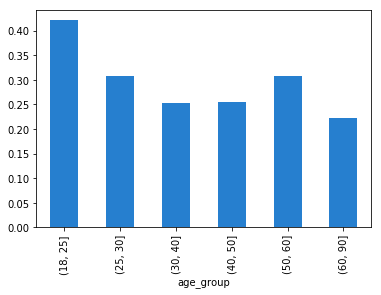

In [27]:
print('AGE DISTRIBUTION A')
_ = (age_dist[1] / age_dist.sum(axis=1)).plot.bar(color='#267fcf')

AGE DISTRIBUTION B


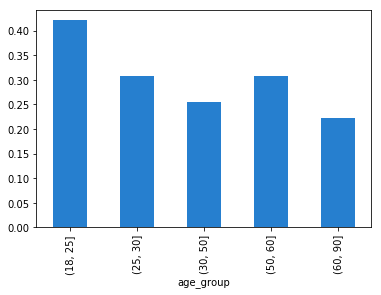

In [28]:
# New Feature: Age Group (Nominal)
print('AGE DISTRIBUTION B')
df['age_group'] =  pd.cut(df.age13,[18,25,30,50,60,90])
_ = df.groupby('age_group').bad.mean().plot.bar(color='#267fcf')

## Predictors Treated as Nominal

In [29]:
v_nominal = list(df.select_dtypes(include='O').columns)
nominal = v_nominal + ['age_group'] + ['installment8','residence11','liable18']
nominal

['checkingstatus1',
 'history3',
 'purpose4',
 'savings6',
 'employ7',
 'status9',
 'others10',
 'property12',
 'otherplans14',
 'housing15',
 'job17',
 'tele19',
 'foreign20',
 'age_group',
 'installment8',
 'residence11',
 'liable18']